In [21]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_trial_complete = pd.merge(mouse_drug_data,clinical_trial_data, how="right",on=["Mouse ID","Mouse ID"])


# Display the data table for preview
clinical_trial_complete.tail()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


(1906, 5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [106]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = clinical_trial_complete.groupby(["Drug","Timepoint"]).mean()['Tumor Volume (mm3)']
tumor_volume_mean

# Convert to DataFrame
tumor_volume_mean = pd.DataFrame(tumor_volume_mean).reset_index()


# Preview DataFrame
tumor_volume_mean.head()

tumor_volume_mean_pivot = tumor_volume_mean.pivot(index='Timepoint',columns='Drug')['Tumor Volume (mm3)']
tumor_volume_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [51]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
vol_sem = clinical_trial_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem() 
vol_sem
# Convert to DataFrame
vol_sem = pd.DataFrame(vol_sem).reset_index()
# Preview DataFrame
vol_sem.columns = ['Drug','Timepoint','vol_sem']

In [24]:
vol_sem_pivot = vol_sem.pivot(index='Timepoint',columns='Drug')['vol_sem']

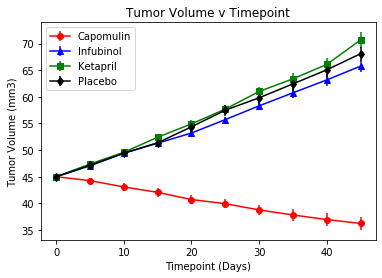

In [55]:
capomulin = plt.errorbar(tumor_volume_mean_pivot.index,tumor_volume_mean_pivot["Capomulin"], yerr=vol_sem_pivot["Capomulin"],color='r',marker='o',label='Capomulin')
plt.title("Tumor Volume v Timepoint")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
infubinol = plt.errorbar(tumor_volume_mean_pivot.index,tumor_volume_mean_pivot["Infubinol"], yerr=vol_sem_pivot["Infubinol"],color='b',marker='^',label="Infubinol")
ketapril = plt.errorbar(tumor_volume_mean_pivot.index,tumor_volume_mean_pivot["Ketapril"], yerr=vol_sem_pivot["Ketapril"],color='g',marker='s',label="Ketapril")
placebo = plt.errorbar(tumor_volume_mean_pivot.index,tumor_volume_mean_pivot["Placebo"], yerr=vol_sem_pivot["Placebo"],color='k',marker='d',label="Placebo")
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="upper left")
plt.savefig("../TumorVolume.png")

In [40]:
# Store the Mean Metastatic Sites Data Grouped by Drug and Timepoint 
metastatic_mean = clinical_trial_complete.groupby(["Drug","Timepoint"]).mean()['Metastatic Sites']
metastatic_mean

# Convert to DataFrame
metastatic_mean = pd.DataFrame(metastatic_mean).reset_index()


# Preview DataFrame
metastatic_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [41]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_pivot = metastatic_mean.pivot(index='Timepoint',columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
metastatic_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [54]:
# Store the Standard Error of Metastatic Sites Grouped by Drug and Timepoint
metastatic_sem = clinical_trial_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem() 

# Convert to DataFrame
metastatic_sem = pd.DataFrame(metastatic_sem).reset_index()
metastatic_sem
# Preview DataFrame
metastatic_sem.columns = ['Drug','Timepoint','metastatic_sem']
metastatic_sem_pivot = metastatic_sem.pivot(index='Timepoint',columns='Drug')['metastatic_sem']
metastatic_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


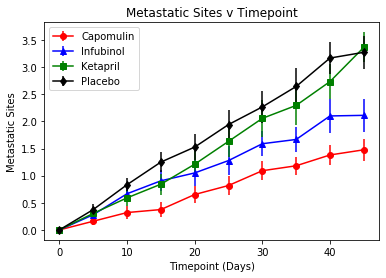

In [62]:
# Generate the Plot (with Error Bars)
capomulin_metastatic = plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Capomulin"], yerr=metastatic_sem_pivot["Capomulin"],color='r',marker='o',label='Capomulin')
plt.title("Metastatic Sites v Timepoint")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Metastatic Sites")
infubinol_metastatic = plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Infubinol"], yerr=metastatic_sem_pivot["Infubinol"],color='b',marker='^',label="Infubinol")
ketapril_metastatic = plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Ketapril"], yerr=metastatic_sem_pivot["Ketapril"],color='g',marker='s',label="Ketapril")
placebo_metastatic = plt.errorbar(metastatic_mean_pivot.index,metastatic_mean_pivot["Placebo"], yerr=metastatic_sem_pivot["Placebo"],color='k',marker='d',label="Placebo")
plt.legend(handles=[capomulin_metastatic, infubinol_metastatic, ketapril_metastatic, placebo_metastatic], loc="upper left")
plt.savefig("../metastatic.png")

In [89]:
# Store the Mouse Count Data Grouped by Drug and Timepoint 
mouse_count = clinical_trial_complete.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
mouse_count

# Convert to DataFrame
mouse_count = pd.DataFrame(mouse_count).reset_index()
mouse_count = mouse_count.rename(columns={"Mouse ID":"Mouse Count"})
mouse_count["Survival Rate"] = mouse_count['Mouse Count']*100/mouse_count['Mouse Count'][0]

# Preview DataFrame
mouse_count.head()

mouse_count_pivot = mouse_count.pivot(index='Timepoint',columns='Drug')['Mouse Count']
mouse_count_pivot
mouse_survival_pivot = mouse_count.pivot(index='Timepoint',columns='Drug')['Survival Rate']
mouse_survival_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


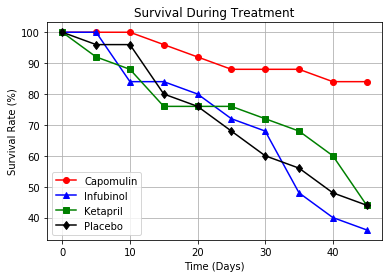

In [92]:
capomulin_survival, = plt.plot(mouse_survival_pivot.index,mouse_survival_pivot["Capomulin"], color='r',marker='o',label='Capomulin')
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
infubinol_survival, = plt.plot(mouse_survival_pivot.index,mouse_survival_pivot["Infubinol"], color='b',marker='^',label="Infubinol")
ketapril_survival, = plt.plot(mouse_survival_pivot.index,mouse_survival_pivot["Ketapril"], color='g',marker='s',label="Ketapril")
placebo_survival, = plt.plot(mouse_survival_pivot.index,mouse_survival_pivot["Placebo"], color='k',marker='d',label="Placebo")
plt.legend(handles=[capomulin_survival, infubinol_survival, ketapril_survival, placebo_survival], loc="lower left")
plt.savefig("../survival.png")

In [125]:
#tumor_volume_mean_change = clinical_trial_complete.groupby(["Drug","Timepoint"]).mean()['Tumor Volume (mm3)']
tumor_volume_mean["Change"] = (tumor_volume_mean["Tumor Volume (mm3)"]-tumor_volume_mean["Tumor Volume (mm3)"[0])*100/tumor_volume_mean["Tumor Volume (mm3)"][0]
tumor_volume_mean["Change"]
#tumor_volume_change_pivot = tumor_volume_mean.pivot(index='Timepoint',columns='Drug')['Change']
#tumor_volume_change_pivot

SyntaxError: invalid syntax (<ipython-input-125-31523b7ff0be>, line 2)